# Simulate data

## simulate a simple dataset

- $X\sim U(0,1)$
- $y = 2 + 9X + \epsilon$
- $\epsilon \sim N(0,1)$

(1000, 1) (1000, 1)


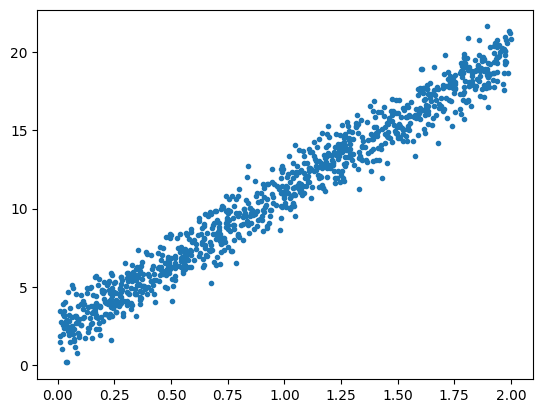

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 1000

X = 2 * np.random.rand(samples, 1)  # Uniform distribution, # Från uniforma distrubitionen plockar vi ut 1000 värden
epsilon = np.random.normal(0, 1, size=(samples, 1))  # location 0, 1 # Vi plockar ut 1000 värden.

print(epsilon.shape, X.shape)

y = 2 + 9 * X + epsilon  # Motsvarar y = kx+m + epsilon är noise(störning)

plt.plot(X, y, ".")
# Scatters är  -> '.'

## När man tänker sample så är det EN datapunkt.


In [2]:
## Construct

X = np.c_[np.ones(samples), X]
X[:5], X.shape


(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

# Train|test split

In [10]:
from sklearn.model_selection import train_test_split

# help(train_test_split) # Stjäl

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)  # vi tog den från text editor för att få allting i rätt ordning.
print(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
)  # De ska addera upp till 1000.


(670, 2) (330, 2) (670, 1) (330, 1)


## Batch gradient descent

In [54]:
np.random.seed(42)


def gradient_descent(X, y, learning_rate=0.1, epochs=100):  # learning rate = eta
    m = len(X)
    theta = np.random.rand(X.shape[1], 1)  # [Beta_0, beta_1]^T

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)  # Från teorin allt förutom etan
        theta -= learning_rate * gradient  # learning_rate är eta i theory
    return theta


theta = gradient_descent(X_train, y_train, epochs=1000)
theta.reshape(-1)  # Throws away additional dimension


array([2.20500716, 8.90206121])

In [57]:
# We gonna try some epoker and see what happens

steps = range(1, 200, 1)
thetas = np.array(
    [gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps]
)  # Reshape slår sönder 2,1 till 2, array. (slänger en dimension)
thetas.shape


(199, 2)

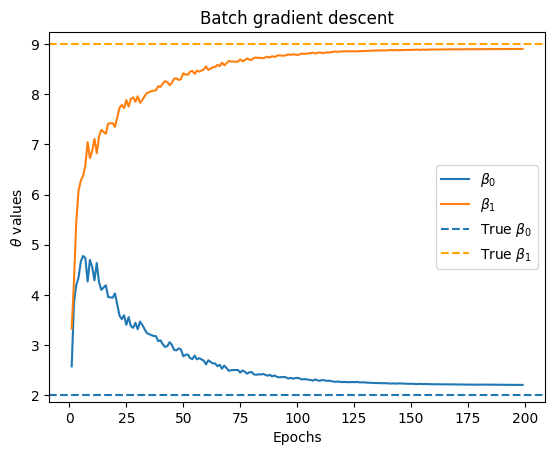

In [66]:
# Plot a graph
fig, ax = plt.figure(), plt.axes()
ax.plot(
    steps, thetas, label=[r"$\beta_0$", r"$\beta_1$"]
)  # Den konvergerar. När den har fler epoker så kommer den närmre till ett värde
ax.axhline(y=2, linestyle="--", label=r"True $\beta_0$")
ax.axhline(y=9, color="Orange", linestyle="--", label=r"True $\beta_1$")
ax.set(xlabel="Epochs", ylabel=r"$\theta$ values", title="Batch gradient descent")
ax.legend()


## Stochastic gradient descent (SGD)

- Geron (2019)

In [70]:
epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters  

# Ju längre tid man går minskar man learning rate kan man dividera med tiden

def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m): # Walks thru every datapoint med återläggning
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1] # ger oss en extra dimension
        y_i = y_train[random_index:random_index+1]

        gradient = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i) # TODO: Tänk varför man gör såhär epoch*m+i
        theta -= eta*gradient
    
theta, epochs

(array([[2.24047467],
        [8.91708298]]),
 10)

In [73]:
y_pred = X_test@theta
MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7687675148456232, 0.9545211492646615, 0.9769959822152092)